# Problem 1

## a)

$P(N_k | D_k) = \frac{e^{-D_k}D_k^{N_k}}{N_k!}$

## b)

$\mathcal{L}(A, B) = \prod_k^K  \frac{e^{-D_k}D_k^{N_k}}{N_k!}$ assuming measurements in each bin are independent.

## c)

$0 = \frac{\partial \ln{\left(\mathcal{L}(A, B)\right)}}{\partial A} = \sum_k^K -\delta_{kl} + \frac{N_k}{D_k}\delta_{kl} = \frac{N_l}{A + B} - 1$

$\implies \hat{A} + \hat{B} = N_l$

$0 = \frac{\partial \ln{\left(\mathcal{L}(A, B)\right)}}{\partial B} = \sum_k^K -1 + \frac{N_k}{D_k} = \frac{N_l}{A + B} - K  + \sum_{k\neq l} \frac{N_k}{B} \implies \sum_{k\neq l} \frac{N_k}{B} = K - 1$

$\implies \boxed{\hat{B} = \sum_{k\neq l} \frac{N_k}{K - 1}, \hat{A} = N_l - \sum_{k\neq l} \frac{N_k}{K - 1}}$

This simply means that $\hat{B}$ is the mean of all bins where we know the signal will be absent. Similarly, $\hat{A}$ is given by subtracting our best guess for the noise ($\hat{B}$) from the photons in the bin known to include the signal ($N_l$).

## d)

$\mathcal{F}_{ij} = -\frac{\partial^2 \ln{\left(\mathcal{L}\right)}}{\partial i \partial j}$

$-\frac{\partial^2 \ln{\left(\mathcal{L}\right)}}{\partial A \partial B} = \sum_k^K \frac{N_k \delta_{kl}}{D_k^2} = \frac{N_l}{(A + B)^2}$

$-\frac{\partial^2 \ln{\left(\mathcal{L}\right)}}{\partial^2 A} = \sum_k^K \frac{N_k \delta_{kl}^2}{D_k^2} = \frac{N_l}{(A + B)^2}$

$-\frac{\partial^2 \ln{\left(\mathcal{L}\right)}}{\partial^2 B} = \sum_k^K \frac{N_k }{D_k^2}$

$\hat{\mathcal{F}} = \begin{pmatrix} \frac{N_l}{(A + B)^2} & \frac{N_l}{(A + B)^2} \\ \frac{N_l}{(A + B)^2} & \sum_k^K \frac{N_k }{D_k^2} \end{pmatrix}$

## e)

$\hat{\mathcal{C}} = \hat{\mathcal{F}}^{-1} = \frac{1}{\frac{N_l}{(A+B)^2}\sum_{k \neq l} \frac{N_k}{B^2}} \begin{pmatrix}  \sum_k^K \frac{N_k }{D_k^2} & -\frac{N_l}{(A + B)^2} \\ -\frac{N_l}{(A + B)^2} & \frac{N_l}{(A + B)^2} \end{pmatrix}$

Evaluating this at $\hat{A}$ and $\hat{B}$ gives:
$\hat{\mathcal{C}} = \begin{pmatrix}  \left(\sum_{k \neq l} \frac{N_k }{(K-1)^2}\right)\left(1 + \sum_{k \neq l} \frac{N_k N_l}{(K-1)^2}\right) & -\sum_{k \neq l} \frac{N_k }{(K-1)^2} \\ -\sum_{k \neq l} \frac{N_k }{(K-1)^2} & \sum_{k \neq l} \frac{N_k }{(K-1)^2} \end{pmatrix}$


## f)

$\sigma^2_A$ and $\sigma_B^2$ resemble Poisson statistics, although the $\sigma^2_A$ term is a sum of different Poisson variances.

## g)

Yes, the two parameter estimators are correlated. This makes sense since, given the data, any increase in the estimate for the noise would have to be compensated by decreasing the signal amplitude and vice-versa.

# Problem 2

## a)

$\lambda_k = D_k \times G$

$D_k = \frac{\lambda_k}{G}$

$\sigma^2_{D_k} = \frac{\sigma^2_{\textrm{RON}}}{G^2} + \frac{D_k}{G}$

$\implies \sigma_{D_k} = \sqrt{\frac{400}{G^2} + \frac{D_k}{G}}$

## b)

$g(x_k , y_k ; \vec{\theta}) = B + A\exp{\left(-\frac{\left[(x_k - x_0)^2 + (y_k - y_0)^2\right]}{2\sigma^2}\right)}$

$\mathcal{X}^2 = \sum_k \frac{\left(D_k - g(x_k , y_k ; \vec{\theta})\right)^2}{\sigma_k^2}$

$\vec{\theta} = \left\{A, B, x_0, y_0, \sigma \right\}$

## c)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import leastsq as lmfitter
from astropy.io import fits
from scipy.stats import chi2
from matplotlib.patches import Ellipse
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png', 'pdf')
pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['figure.dpi']= 300

In [2]:
def read_data(fname='f61final.fits'):
    hdulist = fits.open('f61final.fits')
    img = hdulist[0].data
    hdulist.close()
    data = img[54:64, 136:146]
    return data

def get_noise(data, ron=0.0, gain=2.72):
    term_1 = (ron**2.0)/(gain**2.0)
    term_2 = data/gain
    return np.sqrt(term_1 + term_2)

def get_chi(theta, data, noise):
    xx, yy = np.meshgrid(np.arange(len(data[0, :])), np.arange(len(data[:, 0])))
    model = theta[1] + theta[0]*np.exp(-((xx - theta[2])**2.0
                                         + (yy - theta[3])**2.0)/(2.0*(theta[4]**2.0)))
    return np.array((model - data)/noise).flatten()

In [3]:
data = read_data()
noise = get_noise(data)

In [4]:
init_guess = np.array([1600.0, 200.0, 4.5, 4.5, 3.0])
result = lmfitter(get_chi, init_guess, args=(data, noise), full_output=1)
xx, yy = np.meshgrid(np.arange(len(data[0, :])), np.arange(len(data[:, 0])))
final_theta = result[0]
final_model = final_theta[1]
final_model += final_theta[0]*np.exp(-((xx
                                        - final_theta[2])**2.0
                                       + (yy
                                          - final_theta[3])**2.0)/
                                     (2.0*(final_theta[4]**2.0)))
min_chi2 =  np.sum(result[2]['fvec']**2.0)
total_dof = len(data.flatten()) - len(final_theta)
scale_factor = min_chi2/total_dof
cov_matrix = result[1]* scale_factor
print('A: ', final_theta[0])
print('B: ', final_theta[1])
print('x_0 : ', final_theta[2])
print('y_0: ', final_theta[3])
print('sigma: ', final_theta[4])
print('Minimum Chi^2: ', min_chi2)
print('PTE: ', chi2.sf(min_chi2, total_dof))
print('Not a great fit')


A:  1701.35861152
B:  115.708911681
x_0 :  4.05321938613
y_0:  4.15724597068
sigma:  1.63370770012
Minimum Chi^2:  1099.21506411
PTE:  1.52679195144e-170
Not a great fit


## d)

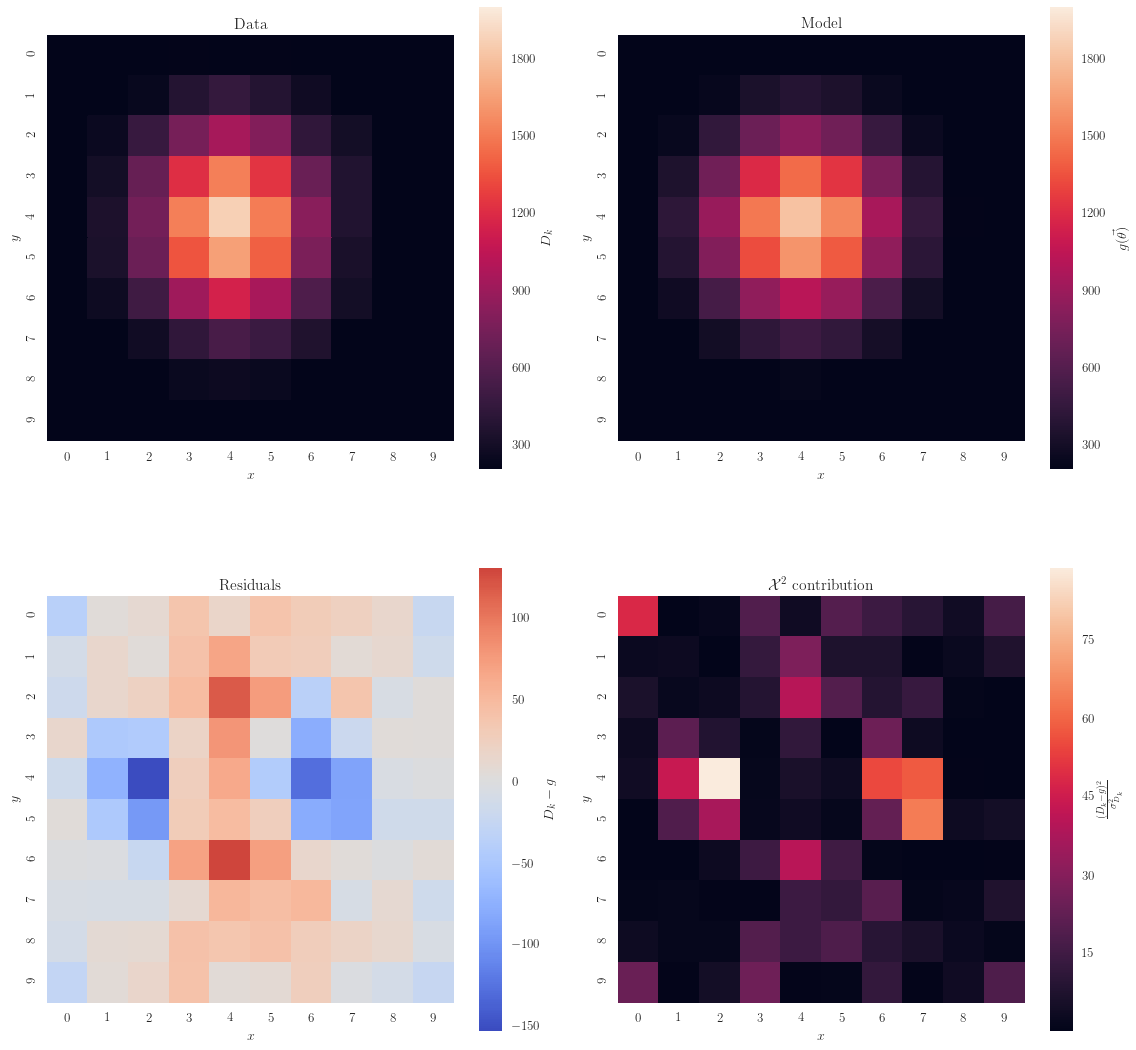

Covariance matrix:  [[  1.23380256e+03   2.88813508e+01  -4.83313958e-03   2.81691230e-03
   -4.79026779e-01]
 [  2.88813508e+01   1.80612862e+01  -1.61173671e-03  -1.27211254e-03
   -5.29707277e-02]
 [ -4.83313958e-03  -1.61173671e-03   5.74173152e-04   3.66693177e-06
    5.34049382e-06]
 [  2.81691230e-03  -1.27211254e-03   3.66693177e-06   6.55069164e-04
    8.44577258e-07]
 [ -4.79026779e-01  -5.29707277e-02   5.34049382e-06   8.44577258e-07
    3.92052081e-04]]


In [5]:
fig, ((ax_data, ax_model), (ax_residual, ax_chi2)) = plt.subplots(nrows=2,ncols=2,
                                                                  figsize=(16, 16))

sns.heatmap(data, square=True,
            cbar=True, ax=ax_data,
            cbar_kws={'label': r'$D_k$',
                     "shrink": .82},
           vmin=200.0, vmax=2000.0)
sns.heatmap(final_model, square=True,
            cbar=True, ax=ax_model,
            cbar_kws={'label': r'$g(\vec{\theta})$',
                     "shrink": .82},
           vmin=200.0, vmax=2000.0)
sns.heatmap(data - final_model, square=True,
            cbar=True, ax=ax_residual,
            cbar_kws={'label': r'$D_k - g$',
                     "shrink": .82},
           cmap='coolwarm',
           center=0.0)
chi2_contribution = ((data - final_model)/noise)**2.0
sns.heatmap(chi2_contribution, square=True,
            cbar=True, ax=ax_chi2,
            cbar_kws={'label': r'$\frac{(D_k - g)^2}{\sigma_{D_k}^2}$',
                     "shrink": .82})

ax_data.set_title('Data')
ax_model.set_title('Model')
ax_residual.set_title('Residuals')
ax_chi2.set_title(r'$\mathcal{X}^2$ contribution')
for ax in [ax_data, ax_model, ax_residual, ax_chi2]:
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
plt.tight_layout()
plt.show()

print('Covariance matrix: ', cov_matrix)

Looking at the residuals, a model that allows different widths along each dimension would work better. The $\sigma_y$ appears greater than the $\sigma_x$ and the outer edges along $x$ are overestimated.

## e)

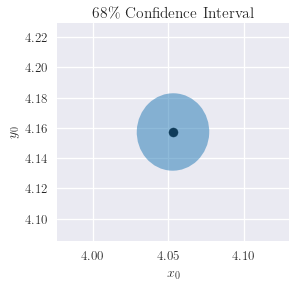

0.0511951185856 0.0479168977899 87.4099224751


In [6]:
sigma_x0 = np.sqrt(cov_matrix[2, 2])
sigma_y0 = np.sqrt(cov_matrix[3, 3])
marg_cov = np.array([[cov_matrix[2, 2], cov_matrix[2, 3]], [cov_matrix[3, 2], cov_matrix[3, 3]]])
vals, vecs = np.linalg.eigh(marg_cov)
order = vals.argsort()[::-1]
vecs = vecs[:,order]
vals = vals[order]
theta_angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
width, height = 2.0 * np.sqrt(vals)
fig, ax = plt.subplots()
ellip = Ellipse(xy=(final_theta[2], final_theta[3]), width=width, height=height, angle=theta_angle, alpha=0.5)
ax.add_artist(ellip)
plt.xlim(final_theta[2]-1.5*width, final_theta[2]+1.5*width)
plt.ylim(final_theta[3]-1.5*height, final_theta[3]+1.5*height)
ax.set_aspect('equal')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$y_0$')
plt.title(r'$68 \%$ Confidence Interval')
plt.scatter(final_theta[2], final_theta[3], marker='o', color='k')
plt.show()
print(width, height, theta_angle)

This is about $10\%$ of a pixel width in uncertainty, which is possible because the Gaussian evaluated at different discrete pixels will still have distinguishable differences based on the centroid position within those pixels.